<a href="https://colab.research.google.com/github/YoussifAssem/Genetics/blob/main/E-Genetics/Code/Genetics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Imports library**

In [12]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


**Reading big (DataSet)**

In [13]:
ds = pd.read_csv('drive/MyDrive/graduation/African.csv')
ds.head()

,Sample (Male/Female/Unknown),rs1896295,rs4671393,rs766432,rs10195871,rs6706648,rs1896294,rs6545817,rs10172646,rs6729815,rs7565301,rs1896296,rs7557939,rs6545816,rs7584113,rs1427407,rs7606173,rs6738440,rs7599488,Class,Population(s)
0,HG01879 (M),C|C,G|G,A|A,G|G,T|C,T|T,C|T,A|A,T|C,G|G,T|T,A|A,A|C,G|G,G|G,C|C,A|A,C|C,Diseased,"ACB, AFR, ALL"
1,HG01880 (F),T|C,A|G,C|A,A|G,C|C,C|T,C|T,G|A,T|C,G|A,G|T,G|A,A|C,A|G,T|G,G|G,A|A,C|T,Diseased,"ACB, AFR, ALL"
2,HG01882 (M),C|C,G|G,A|A,G|G,C|C,T|T,T|T,A|A,C|C,A|A,T|T,A|A,C|C,G|G,G|G,G|G,A|A,T|T,Diseased,"ACB, AFR, ALL"
3,HG01883 (F),C|T,G|A,A|C,G|A,T|C,T|C,C|C,A|G,T|T,G|G,T|G,A|G,A|A,G|A,G|T,C|G,G|A,C|C,Carrier,"ACB, AFR, ALL"
4,HG01885 (M),C|C,G|G,A|A,G|G,C|T,T|T,T|C,A|A,C|T,A|G,T|T,A|A,C|A,G|G,G|G,G|C,A|A,T|C,Diseased,"ACB, AFR, ALL"


**Illustrates DataSet Output**

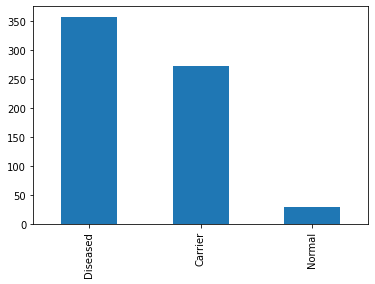

In [14]:
ds['Class'].value_counts().plot.bar()

**Convert Males And Females**

In [16]:
ds['Sample (Male/Female/Unknown)'] = ds['Sample (Male/Female/Unknown)'].str.contains('M')
print(ds['Sample (Male/Female/Unknown)'])
ds['Sample (Male/Female/Unknown)'] = ds['Sample (Male/Female/Unknown)'].replace(True, '0')
ds['Sample (Male/Female/Unknown)'] = ds['Sample (Male/Female/Unknown)'].replace(False, '1')
print(ds['Sample (Male/Female/Unknown)'])
cop = ds.copy()

0      False
1      False
2      False
3      False
4      False
       ...  
656    False
657    False
658    False
659    False
660    False
Name: Sample (Male/Female/Unknown), Length: 661, dtype: bool
0      1
1      1
2      1
3      1
4      1
      ..
656    1
657    1
658    1
659    1
660    1
Name: Sample (Male/Female/Unknown), Length: 661, dtype: object


**Pre processing Data**

In [18]:
#rs1896295
#Normal
ds['rs1896295'] = ds['rs1896295'].replace('T|T', '0')
#Carrier
ds['rs1896295'] = ds['rs1896295'].replace('T|C', '1')
ds['rs1896295'] = ds['rs1896295'].replace('C|T', '1')
#Diseased
ds['rs1896295'] = ds['rs1896295'].replace('C|C', '2')



#rs4671393   (PROBLEM)
#Normal
ds['rs4671393'] = ds['rs4671393'].replace('A|A', '0')
#Carrier
ds['rs4671393'] = ds['rs4671393'].replace('A|C', '1')
ds['rs4671393'] = ds['rs4671393'].replace('C|A', '1')
ds['rs4671393'] = ds['rs4671393'].replace('A|G', '1')
ds['rs4671393'] = ds['rs4671393'].replace('G|A', '1')

#Diseased
ds['rs4671393'] = ds['rs4671393'].replace('C|C', '2')
ds['rs4671393'] = ds['rs4671393'].replace('G|G', '2')


#rs766432
#Normal
ds['rs766432'] = ds['rs766432'].replace('C|C', '0')
#Carrier
ds['rs766432'] = ds['rs766432'].replace('A|C', '1')
ds['rs766432'] = ds['rs766432'].replace('C|A', '1')
#Diseased
ds['rs766432'] = ds['rs766432'].replace('A|A', '2')

#rs10195871
#Normal
ds['rs10195871'] = ds['rs10195871'].replace('A|A', '0')
#Carrier
ds['rs10195871'] = ds['rs10195871'].replace('A|G', '1')
ds['rs10195871'] = ds['rs10195871'].replace('G|A', '1')
#Diseased
ds['rs10195871'] = ds['rs10195871'].replace('G|G', '2')

#rs6706648  (PROBLEM)
#Normal
ds['rs6706648'] = ds['rs6706648'].replace('C|C', '0')
#Carrier
ds['rs6706648'] = ds['rs6706648'].replace('C|G', '1')
ds['rs6706648'] = ds['rs6706648'].replace('G|C', '1')
ds['rs6706648'] = ds['rs6706648'].replace('T|C', '1')
ds['rs6706648'] = ds['rs6706648'].replace('C|T', '1')

#Diseased
ds['rs6706648'] = ds['rs6706648'].replace('G|G', '2')
ds['rs6706648'] = ds['rs6706648'].replace('T|T', '2')


#rs1896294 (PROBLEM)
#Normal
ds['rs1896294'] = ds['rs1896294'].replace('C|C', '0')
#Carrier
ds['rs1896294'] = ds['rs1896294'].replace('C|G', '1')
ds['rs1896294'] = ds['rs1896294'].replace('G|C', '1')
ds['rs1896294'] = ds['rs1896294'].replace('C|T', '1')
ds['rs1896294'] = ds['rs1896294'].replace('T|C', '1')
#Diseased
ds['rs1896294'] = ds['rs1896294'].replace('G|G', '2')
ds['rs1896294'] = ds['rs1896294'].replace('T|T', '2')



#rs6545817
#Normal
ds['rs6545817'] = ds['rs6545817'].replace('C|C', '0')
#Carrier
ds['rs6545817'] = ds['rs6545817'].replace('C|T', '1')
ds['rs6545817'] = ds['rs6545817'].replace('T|C', '1')
#Diseased
ds['rs6545817'] = ds['rs6545817'].replace('T|T', '2')


#rs10172646
#Normal
ds['rs10172646'] = ds['rs10172646'].replace('G|G', '0')
#Carrier
ds['rs10172646'] = ds['rs10172646'].replace('G|A', '1')
ds['rs10172646'] = ds['rs10172646'].replace('A|G', '1')
#Diseased
ds['rs10172646'] = ds['rs10172646'].replace('A|A', '2')


#rs6729815
#Normal
ds['rs6729815'] = ds['rs6729815'].replace('T|T', '0')
#Carrier
ds['rs6729815'] = ds['rs6729815'].replace('T|C', '1')
ds['rs6729815'] = ds['rs6729815'].replace('C|T', '1')
#Diseased
ds['rs6729815'] = ds['rs6729815'].replace('C|C', '2')


#rs7565301
#Normal
ds['rs7565301'] = ds['rs7565301'].replace('G|G', '0')
#Carrier
ds['rs7565301'] = ds['rs7565301'].replace('G|A', '1')
ds['rs7565301'] = ds['rs7565301'].replace('A|G', '1')
#Diseased
ds['rs7565301'] = ds['rs7565301'].replace('A|A', '2')



#rs1896296
#Normal
ds['rs1896296'] = ds['rs1896296'].replace('G|G', '0')
#Carrier
ds['rs1896296'] = ds['rs1896296'].replace('G|T', '1')
ds['rs1896296'] = ds['rs1896296'].replace('T|G', '1')
#Diseased
ds['rs1896296'] = ds['rs1896296'].replace('T|T', '2')


#rs7557939
#Normal
ds['rs7557939'] = ds['rs7557939'].replace('G|G', '0')
#Carrier
ds['rs7557939'] = ds['rs7557939'].replace('G|A', '1')
ds['rs7557939'] = ds['rs7557939'].replace('A|G', '1')
#Diseased
ds['rs7557939'] = ds['rs7557939'].replace('A|A', '2')

#rs6545816
#Normal
ds['rs6545816'] = ds['rs6545816'].replace('A|A', '0')
#Carrier
ds['rs6545816'] = ds['rs6545816'].replace('A|C', '1')
ds['rs6545816'] = ds['rs6545816'].replace('C|A', '1')
#Diseased
ds['rs6545816'] = ds['rs6545816'].replace('C|C', '2')

#rs7584113
#Normal
ds['rs7584113'] = ds['rs7584113'].replace('A|A', '0')
#Carrier
ds['rs7584113'] = ds['rs7584113'].replace('A|G', '1')
ds['rs7584113'] = ds['rs7584113'].replace('G|A', '1')
#Diseased
ds['rs7584113'] = ds['rs7584113'].replace('G|G', '2')

#rs1427407  (PROBLEM)
#Normal
ds['rs1427407'] = ds['rs1427407'].replace('T|T', '0')
#Carrier
ds['rs1427407'] = ds['rs1427407'].replace('T|C', '1')
ds['rs1427407'] = ds['rs1427407'].replace('C|T', '1')
ds['rs1427407'] = ds['rs1427407'].replace('T|G', '1')
ds['rs1427407'] = ds['rs1427407'].replace('G|T', '1')
#Diseased
ds['rs1427407'] = ds['rs1427407'].replace('C|C', '2')
ds['rs1427407'] = ds['rs1427407'].replace('G|G', '2')



#rs7606173  (PROBLEM)
#Normal
ds['rs7606173'] = ds['rs7606173'].replace('G|G', '0')
#Carrier
ds['rs7606173'] = ds['rs7606173'].replace('G|A', '1')
ds['rs7606173'] = ds['rs7606173'].replace('A|G', '1')
ds['rs7606173'] = ds['rs7606173'].replace('C|G', '1')
ds['rs7606173'] = ds['rs7606173'].replace('G|C', '1')
#Diseased
ds['rs7606173'] = ds['rs7606173'].replace('A|A', '2')
ds['rs7606173'] = ds['rs7606173'].replace('C|C', '2')



#rs6738440
#Normal
ds['rs6738440'] = ds['rs6738440'].replace('A|A', '0')
#Carrier
ds['rs6738440'] = ds['rs6738440'].replace('G|A', '1')
ds['rs6738440'] = ds['rs6738440'].replace('A|G', '1')
#Diseased
ds['rs6738440'] = ds['rs6738440'].replace('G|G', '2')


#rs7599488 (PROBLEM)
#Normal
ds['rs7599488'] = ds['rs7599488'].replace('C|C', '0')
#Carrier
ds['rs7599488'] = ds['rs7599488'].replace('C|G', '1')
ds['rs7599488'] = ds['rs7599488'].replace('G|C', '1')
ds['rs7599488'] = ds['rs7599488'].replace('C|T', '1')
ds['rs7599488'] = ds['rs7599488'].replace('T|C', '1')
#Diseased
ds['rs7599488'] = ds['rs7599488'].replace('G|G', '2')
ds['rs7599488'] = ds['rs7599488'].replace('T|T', '2')


ds = ds.drop(columns=['Population(s)'])
cop = cop.drop(columns=['Population(s)'])
ds.head()

,Sample (Male/Female/Unknown),rs1896295,rs4671393,rs766432,rs10195871,rs6706648,rs1896294,rs6545817,rs10172646,rs6729815,rs7565301,rs1896296,rs7557939,rs6545816,rs7584113,rs1427407,rs7606173,rs6738440,rs7599488,Class
0,1,2,2,2,2,1,2,1,2,1,0,2,2,1,2,2,2,0,0,Diseased
1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,0,1,Diseased
2,1,2,2,2,2,0,2,2,2,2,2,2,2,2,2,2,0,0,2,Diseased
3,1,1,1,1,1,1,1,0,1,0,0,1,1,0,1,1,1,1,0,Carrier
4,1,2,2,2,2,1,2,1,2,1,1,2,2,1,2,2,1,0,1,Diseased


****Make Data Ready for Creating Algorithms of(bigData)****

In [19]:
cop.head()

,Sample (Male/Female/Unknown),rs1896295,rs4671393,rs766432,rs10195871,rs6706648,rs1896294,rs6545817,rs10172646,rs6729815,rs7565301,rs1896296,rs7557939,rs6545816,rs7584113,rs1427407,rs7606173,rs6738440,rs7599488,Class
0,1,C|C,G|G,A|A,G|G,T|C,T|T,C|T,A|A,T|C,G|G,T|T,A|A,A|C,G|G,G|G,C|C,A|A,C|C,Diseased
1,1,T|C,A|G,C|A,A|G,C|C,C|T,C|T,G|A,T|C,G|A,G|T,G|A,A|C,A|G,T|G,G|G,A|A,C|T,Diseased
2,1,C|C,G|G,A|A,G|G,C|C,T|T,T|T,A|A,C|C,A|A,T|T,A|A,C|C,G|G,G|G,G|G,A|A,T|T,Diseased
3,1,C|T,G|A,A|C,G|A,T|C,T|C,C|C,A|G,T|T,G|G,T|G,A|G,A|A,G|A,G|T,C|G,G|A,C|C,Carrier
4,1,C|C,G|G,A|A,G|G,C|T,T|T,T|C,A|A,C|T,A|G,T|T,A|A,C|A,G|G,G|G,G|C,A|A,T|C,Diseased


In [20]:
X_train, X_test, y_train, y_test = train_test_split(ds.drop('Class', axis=1), ds['Class'], test_size=0.3)
print('X_Train\n\n', X_train)
print('X_Test\n\n', X_test)
print('y_Train\n\n', y_train)
print('y_Test\n\n', y_test)

X_Train

     Sample (Male/Female/Unknown) rs1896295  ... rs6738440 rs7599488
651                            1         1  ...         0         0
522                            1         2  ...         0         2
423                            1         1  ...         1         0
244                            1         1  ...         0         0
11                             1         1  ...         1         0
..                           ...       ...  ...       ...       ...
211                            1         0  ...         0         0
127                            1         2  ...         1         1
424                            1         2  ...         0         2
252                            1         2  ...         2         0
641                            1         2  ...         1         1

[462 rows x 19 columns]
X_Test

     Sample (Male/Female/Unknown) rs1896295  ... rs6738440 rs7599488
278                            1         0  ...         0         0
574 

**Creating KNN Algorithm for (DataSet)**

In [21]:
knnModel = KNeighborsClassifier(n_neighbors=3)
knnModel.fit(X_train, y_train)
print(knnModel.predict(X_test))
'''
'micro':  (Counting total True Positive and False Negative and False Positive)
'macro': (Create matrics for each label and find their unweighted mean)
'weighted': (Create matrics for each label, Count number of True in each label)
'''

print('\n\n\nKNN Accuracy:', knnModel.score(X_test,y_test))
print('\nF_Score -> KNN None:', f1_score(y_test, knnModel.predict(X_test),  average=None))
print('\nF_Score -> KNN Micro:', f1_score(y_test, knnModel.predict(X_test),  average='micro'))
print('\nF_Score -> KNN Macro:', f1_score(y_test, knnModel.predict(X_test),  average='macro'))
print('\nF_Score -> KNN Weight:', f1_score(y_test, knnModel.predict(X_test),  average='weighted'))


['Normal' 'Diseased' 'Carrier' 'Normal' 'Diseased' 'Diseased' 'Diseased'
 'Diseased' 'Carrier' 'Diseased' 'Normal' 'Carrier' 'Diseased' 'Diseased'
 'Diseased' 'Diseased' 'Diseased' 'Diseased' 'Diseased' 'Diseased'
 'Carrier' 'Normal' 'Carrier' 'Diseased' 'Diseased' 'Carrier' 'Carrier'
 'Diseased' 'Diseased' 'Normal' 'Diseased' 'Diseased' 'Diseased' 'Normal'
 'Carrier' 'Diseased' 'Diseased' 'Diseased' 'Diseased' 'Carrier'
 'Diseased' 'Carrier' 'Diseased' 'Diseased' 'Diseased' 'Diseased'
 'Diseased' 'Diseased' 'Diseased' 'Diseased' 'Carrier' 'Diseased'
 'Carrier' 'Diseased' 'Diseased' 'Diseased' 'Diseased' 'Carrier'
 'Diseased' 'Carrier' 'Diseased' 'Diseased' 'Diseased' 'Carrier'
 'Diseased' 'Normal' 'Carrier' 'Diseased' 'Carrier' 'Carrier' 'Diseased'
 'Carrier' 'Normal' 'Diseased' 'Diseased' 'Diseased' 'Diseased' 'Carrier'
 'Carrier' 'Diseased' 'Carrier' 'Diseased' 'Diseased' 'Carrier' 'Diseased'
 'Diseased' 'Carrier' 'Carrier' 'Diseased' 'Carrier' 'Carrier' 'Diseased'
 'Carrier' 'Norma

**Creating SVC Algorithm for (DataSet)**

In [22]:
svcModel = SVC(kernel='linear', C=1)
svcModel.fit(X_train, y_train)
print(svcModel.predict(X_test))

print('SVC Accuracy: ', svcModel.score(X_test,y_test))
print('\nF_Score -> SVC None:', f1_score(y_test, svcModel.predict(X_test),  average=None))
print('\nF_Score -> SVC Micro:', f1_score(y_test, svcModel.predict(X_test),  average='micro'))
print('\nF_Score -> SVC Macro:', f1_score(y_test, svcModel.predict(X_test),  average='macro'))
print('\nF_Score -> SVC Weight:', f1_score(y_test, svcModel.predict(X_test),  average='weighted'))


['Normal' 'Diseased' 'Carrier' 'Normal' 'Diseased' 'Diseased' 'Diseased'
 'Diseased' 'Carrier' 'Diseased' 'Normal' 'Carrier' 'Diseased' 'Diseased'
 'Diseased' 'Diseased' 'Diseased' 'Diseased' 'Diseased' 'Diseased'
 'Carrier' 'Normal' 'Carrier' 'Diseased' 'Diseased' 'Carrier' 'Carrier'
 'Diseased' 'Diseased' 'Carrier' 'Diseased' 'Diseased' 'Diseased' 'Normal'
 'Carrier' 'Diseased' 'Diseased' 'Diseased' 'Diseased' 'Carrier'
 'Diseased' 'Carrier' 'Diseased' 'Diseased' 'Diseased' 'Diseased'
 'Diseased' 'Diseased' 'Diseased' 'Diseased' 'Carrier' 'Diseased'
 'Carrier' 'Diseased' 'Diseased' 'Diseased' 'Diseased' 'Carrier'
 'Diseased' 'Carrier' 'Diseased' 'Diseased' 'Diseased' 'Carrier'
 'Diseased' 'Normal' 'Carrier' 'Diseased' 'Carrier' 'Carrier' 'Diseased'
 'Carrier' 'Normal' 'Diseased' 'Diseased' 'Diseased' 'Diseased' 'Carrier'
 'Carrier' 'Diseased' 'Carrier' 'Diseased' 'Diseased' 'Carrier' 'Diseased'
 'Diseased' 'Carrier' 'Carrier' 'Diseased' 'Carrier' 'Carrier' 'Diseased'
 'Carrier' 'Norm

**Decision Tree**

Decision Tree Accuracy 0.9949748743718593

F_Score -> Decision Tree None: [0.99371069 0.99539171 1.        ]

F_Score -> Decision Tree Micro: 0.9949748743718593

F_Score -> Decision Tree Macro: 0.9963674656310079

F_Score -> Decision Tree Weight: 0.9949790980232291


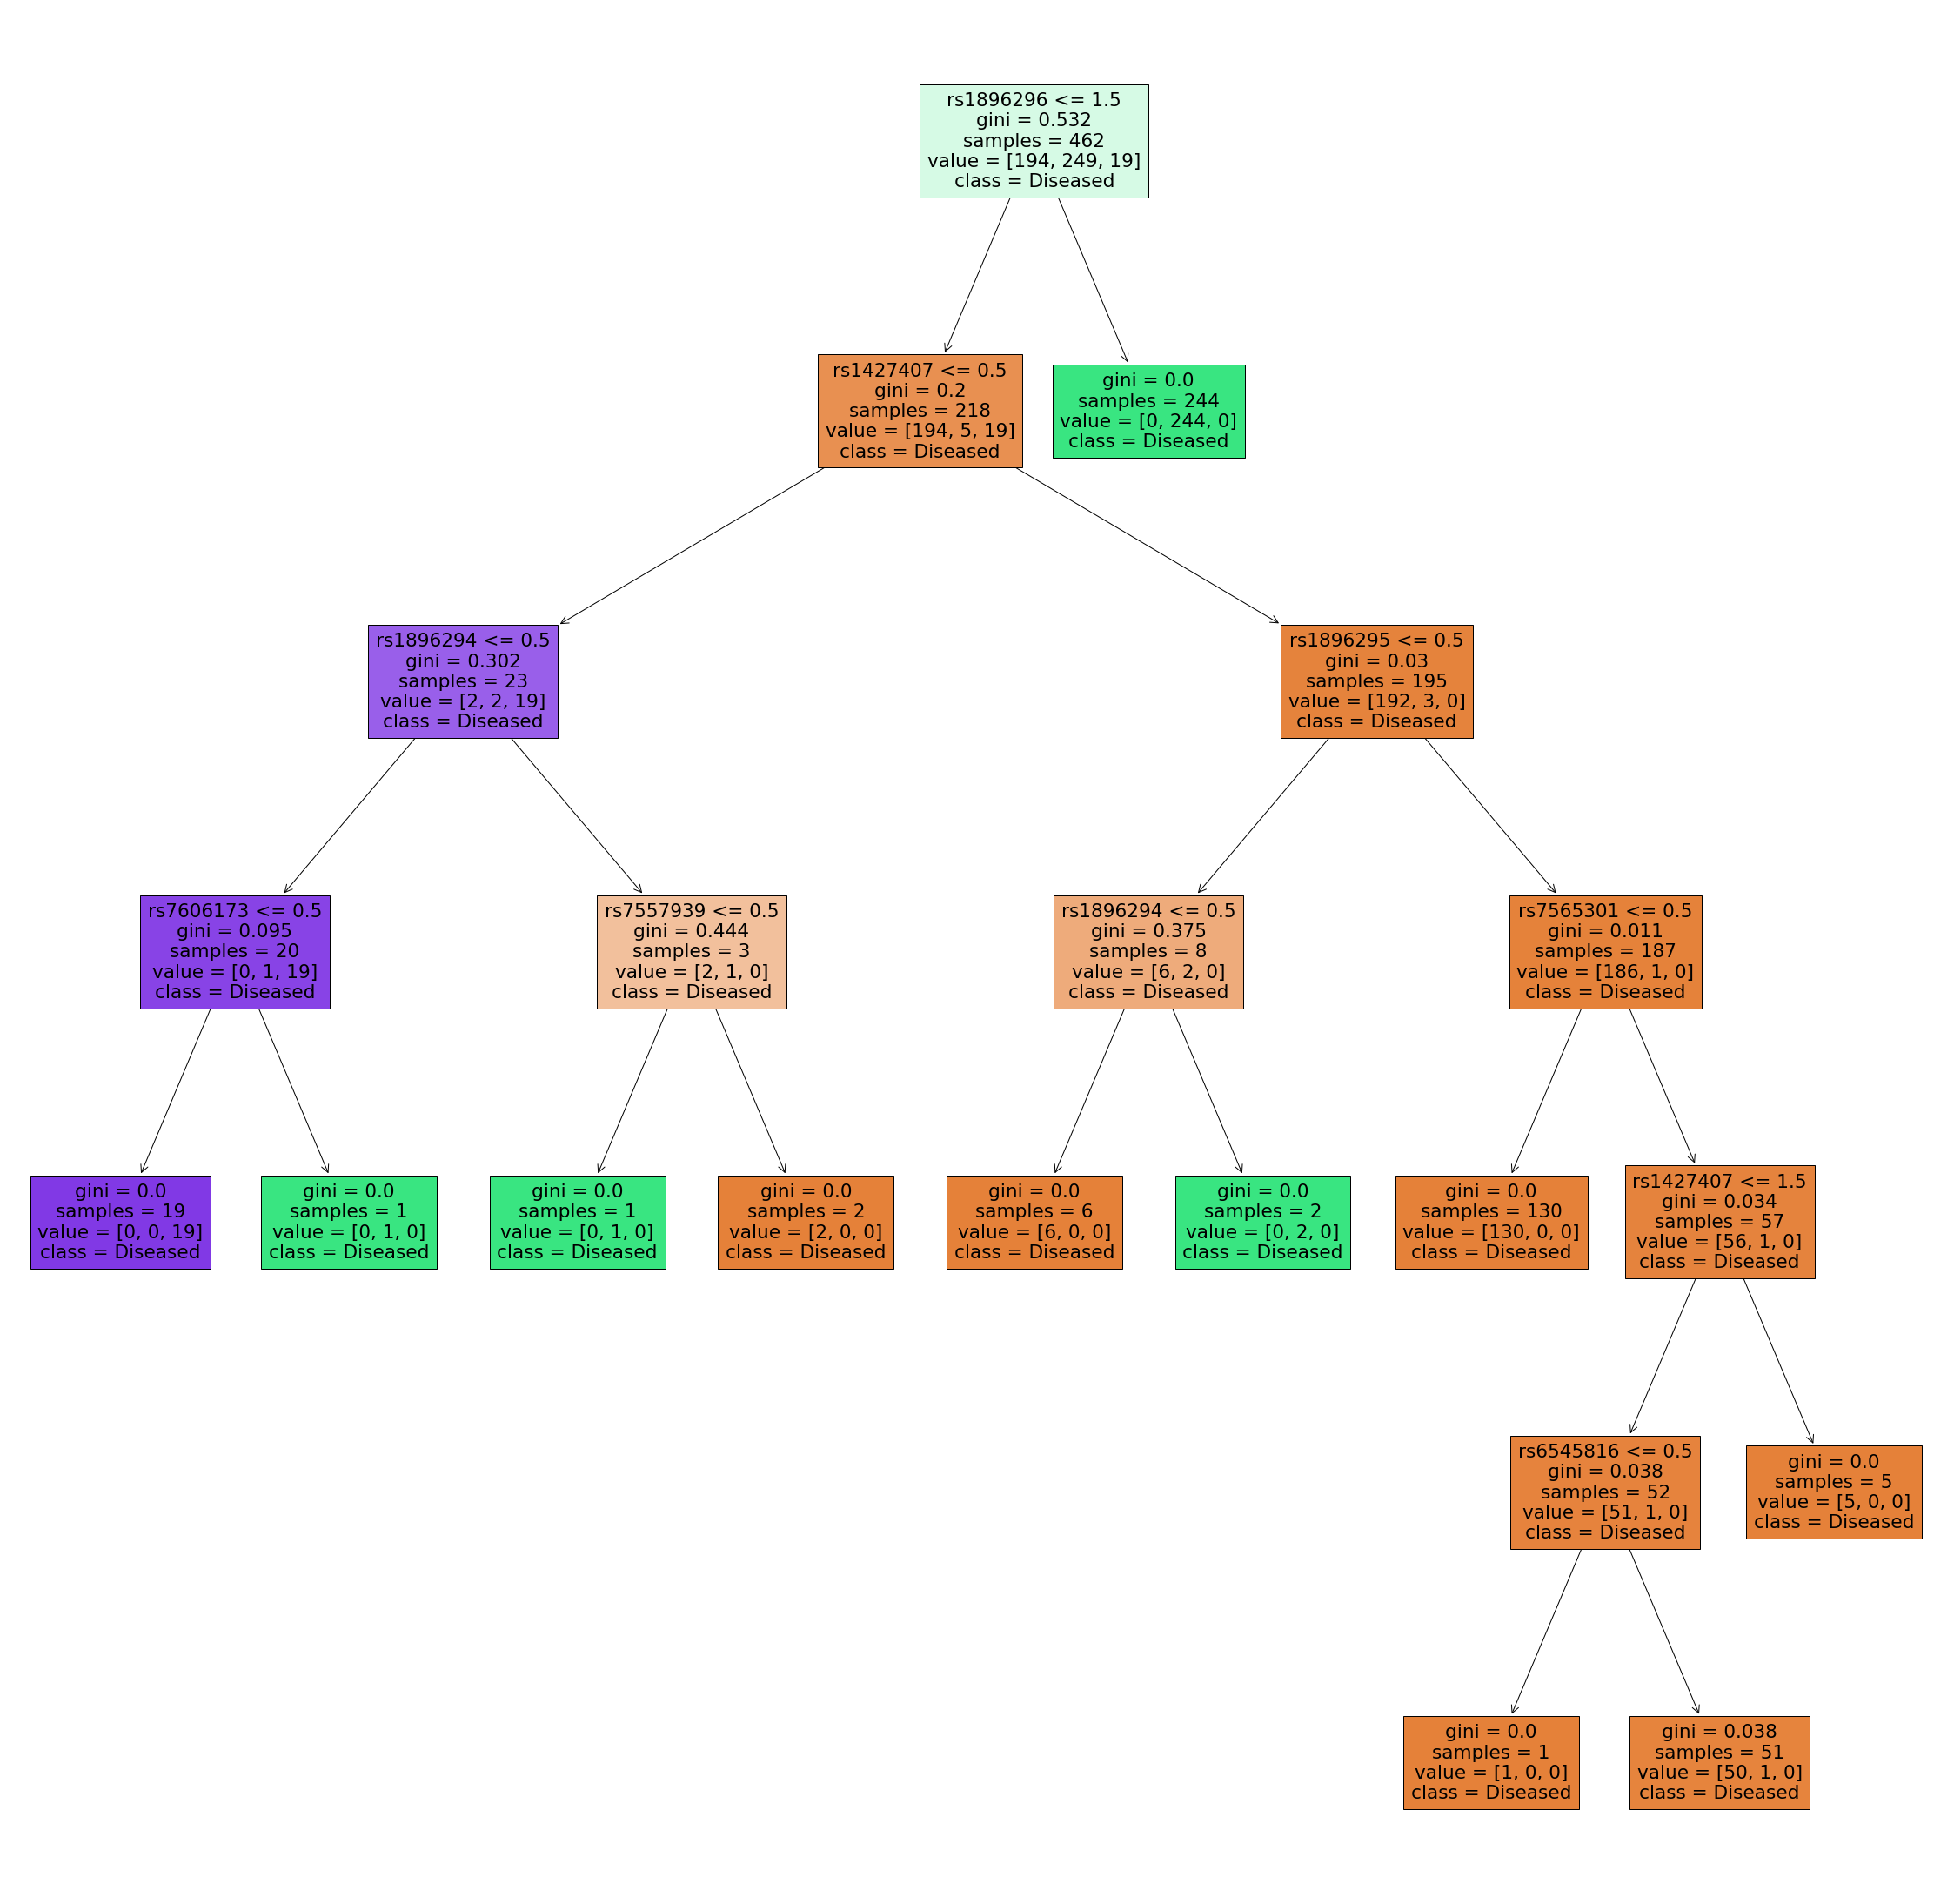

In [25]:
decisionTreeModel = DecisionTreeClassifier()
decisionTreeModel.fit(X_train, y_train)
fi = plt.figure(figsize=(40, 40))
plo = plot_tree(decisionTreeModel, feature_names=list(ds.columns), class_names=ds['Class'],filled=True)
print('Decision Tree Accuracy', decisionTreeModel.score(X_test, y_test))
print('\nF_Score -> Decision Tree None:', f1_score(y_test, decisionTreeModel.predict(X_test),  average=None))
print('\nF_Score -> Decision Tree Micro:', f1_score(y_test, decisionTreeModel.predict(X_test),  average='micro'))
print('\nF_Score -> Decision Tree Macro:', f1_score(y_test, decisionTreeModel.predict(X_test),  average='macro'))
print('\nF_Score -> Decision Tree Weight:', f1_score(y_test, decisionTreeModel.predict(X_test),  average='weighted'))
